Proyek Analisis Data: Analisis Bike Sharing Dataset

Nama: Septi Aprilia Wulandari  
Email: septiapriliawulandari1@gmail.com  
ID Dicoding: septi-aprilia-w

Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda?
- Pertanyaan 2: Pada Jam Berapa Penyewaan Sepeda Terjadi Paling Banyak?

Import Semua Packages/Library yang Digunakan

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load data

In [18]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

Pertanyaan Bisnis 1: Bagaimana Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda?


Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda


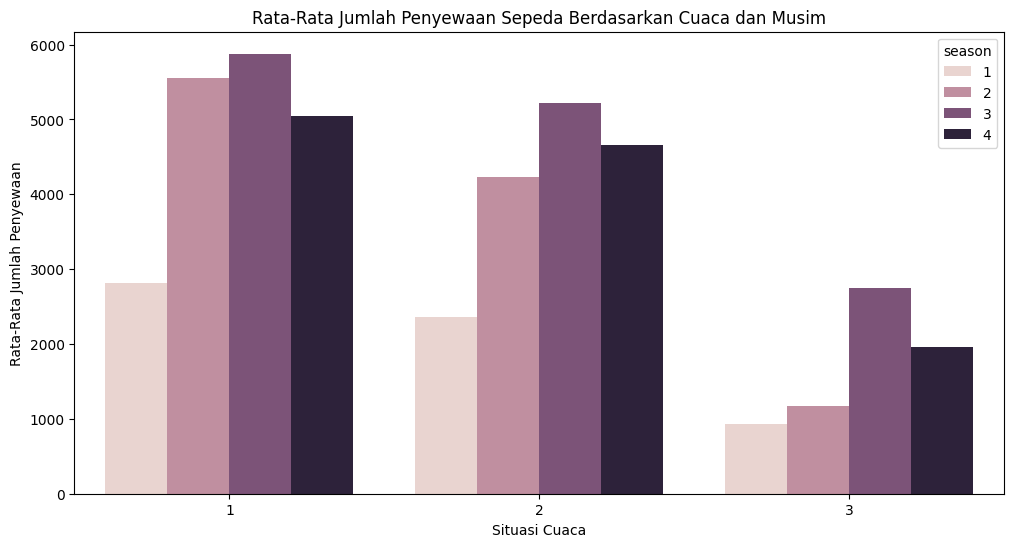

In [19]:
print('\nPengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda')
weather_season_grouped = day_data.groupby(['weathersit', 'season']).agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', hue='season', data=weather_season_grouped)
plt.title('Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Cuaca dan Musim')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.show()

Pertanyaan Bisnis 2: Pada Jam Berapa Penyewaan Sepeda Terjadi Paling Banyak


Jam-Jam Sibuk untuk Penyewaan Sepeda


C:\Users\wulandari\AppData\Local\Temp\ipykernel_3816\1568548750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hour_grouped, palette='Blues_d')


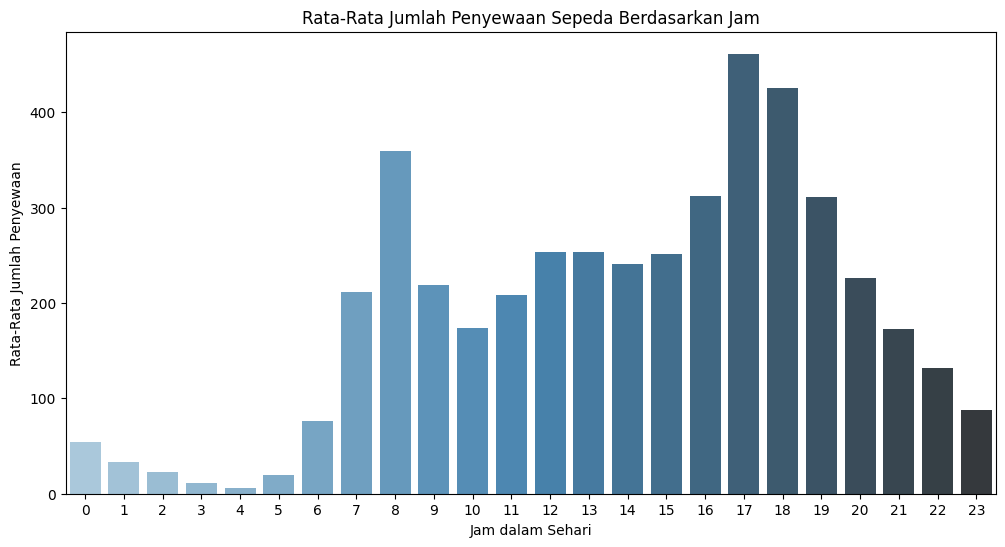

In [20]:
print('\nJam-Jam Sibuk untuk Penyewaan Sepeda')
hour_grouped = hour_data.groupby('hr').agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hour_grouped, palette='Blues_d')
plt.title('Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.show()


Mengidentifikasi anomali dalam penyewaan sepeda


Identifikasi Anomali dalam Penyewaan Sepeda


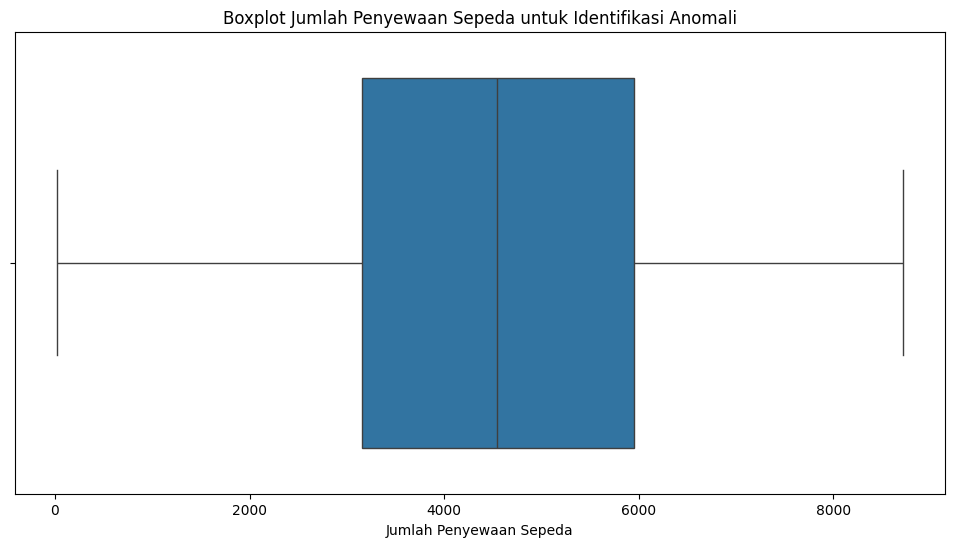

In [22]:
print('\nIdentifikasi Anomali dalam Penyewaan Sepeda')
plt.figure(figsize=(12, 6))
sns.boxplot(x=day_data['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda untuk Identifikasi Anomali')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.show()

Data Wrangling

In [23]:
print('\nPengolahan Data')
print('Data Harian:')
print(day_data.head())
print('\nData Per Jam:')
print(hour_data.head())


Pengolahan Data
Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  160

Exploratory Data Analysis

- Memilih hanya kolom numerik untuk menghitung korelasi

In [24]:
numeric_columns = day_data.select_dtypes(include=['number'])

Membuat Heatmap korelasi untuk kolom numerik


Analisis Data Eksploratif
Heatmap Korelasi untuk Data Harian:


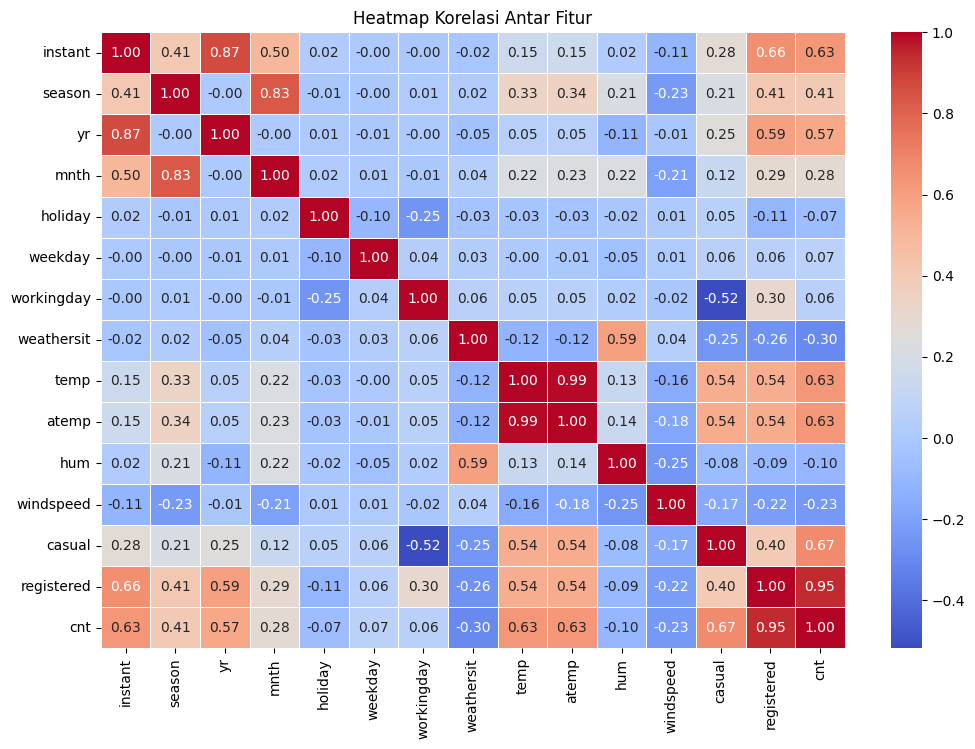

In [25]:
print('\nAnalisis Data Eksploratif')
print('Heatmap Korelasi untuk Data Harian:')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Data Visualization


Visualisasi Data Penyewaan Sepeda
Distribusi Jumlah Penyewaan Sepeda:


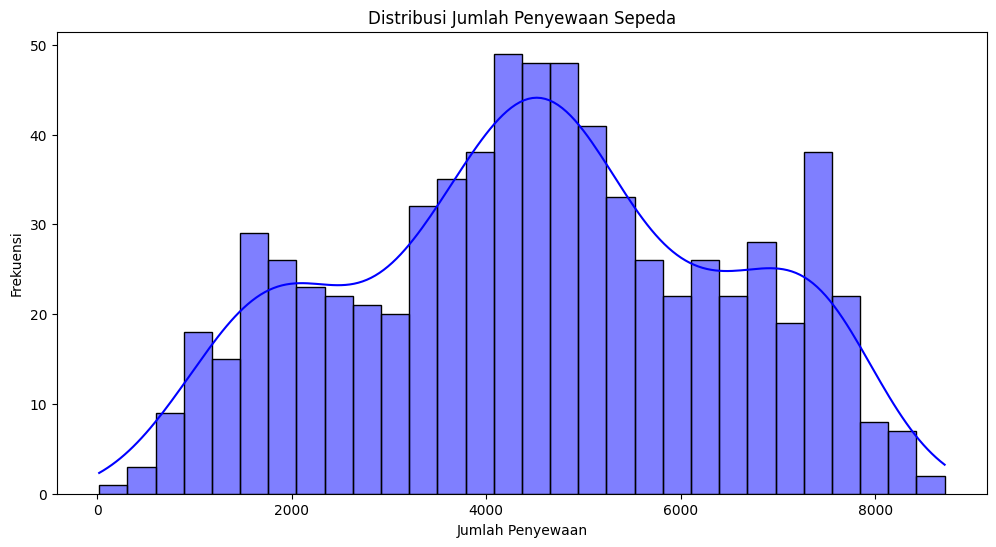

In [26]:
print('\nVisualisasi Data Penyewaan Sepeda')
print('Distribusi Jumlah Penyewaan Sepeda:')
plt.figure(figsize=(12, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

Kesimpulan

- Kesimpulan Pertanyaan 1 : Dari analisis yang dilakukan, ditemukan bahwa **cuaca dan musim** secara signifikan mempengaruhi jumlah penyewaan sepeda. Situasi cuaca yang lebih baik dan musim yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda.

- Kesimpulan Pertanyaan 2 : Dari analisis waktu dalam sehari, terlihat bahwa **jam sibuk** penyewaan sepeda terjadi pada pagi hari sekitar jam 8 dan sore hari sekitar jam 17, yang kemungkinan besar terkait dengan waktu berangkat dan pulang kerja.